# IMPORTS, FUNCTIONS AND OTHER STATIC STUFF

In [6]:
from lime import our_lime
import random
from PIL import Image
from pathlib import Path
from skimage.segmentation import mark_boundaries
import torch
from torchvision import models, transforms
from torch.autograd import Variable
import torch.nn.functional as F

### STATIC PATHS ###
ROOT_DIR = Path.cwd()
CAT_IMG_PATH = ROOT_DIR / 'predict' / 'cat'
DOG_IMG_PATH = ROOT_DIR / 'predict' / 'dog'
#CAT_AND_DOG_IMG_PATH = ROOT_DIR / 'cat_and_dog_in_same_image'
BLACKBOX_CLASSIFIER_WEIGHT_PATH = ROOT_DIR / 'data' / 'dogs_vs_cats'/ 'CatVsDog_weights'
classes = ["Cat", "Dog"]

### FUNCTIONS ###
def pick_random_image(path):
    #randomly pick a dog or cat image from image folder
    img_files = list(path.glob('*.jpg*'))
    img_file = random.choice(img_files)
    return img_file
    
    
#check if paths are valid
if not Path(CAT_IMG_PATH):
    print(f"Warning: The cat image directory was not found:\n{CAT_IMG_PATH}")
if not Path(DOG_IMG_PATH):
    print(f"Warning: The dog image directory was not found:\n{DOG_IMG_PATH}")
if not Path(BLACKBOX_CLASSIFIER_WEIGHT_PATH):
    print(f"Warning: The blackbox classifier weights were not found:\n{BLACKBOX_CLASSIFIER_WEIGHT_PATH}")

# Demo: Image Class Object

C:\Users\JOCL\Desktop\Andet\10Semester\Advanced_Machine_Learning\Projects\Explainability\code\LIME\predict\cat\668.jpg
None
None


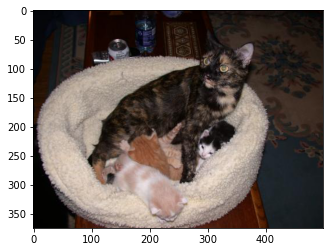

In [7]:
#pick random cat image
random_cat_image = pick_random_image(CAT_IMG_PATH)
ImageObjectDemo = our_lime.ImageObject(random_cat_image)

#Attributes fugde_image and superpixels are initialized as None
print(ImageObjectDemo.original_image_path, ImageObjectDemo.fudge_image, ImageObjectDemo.superpixels, sep="\n")
ImageObjectDemo.show()

In [10]:
#When Explainer funtion creates fugde images and superpixels, ImageObject attributes can be updated
ImageObjectDemo.change_attribute("ding", "dong")
print(ImageObjectDemo.fudge_image, ImageObjectDemo.superpixels, sep="\n")
ImageObjectDemo.change_attribute("ling")
print(ImageObjectDemo.fudge_image, ImageObjectDemo.superpixels, sep="\n")

ding
dong
ling
dong
